In [2]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import json

all 554


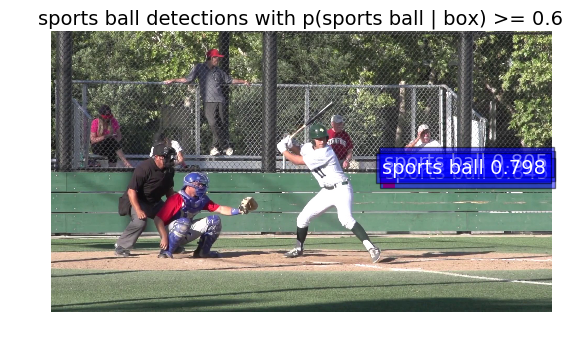

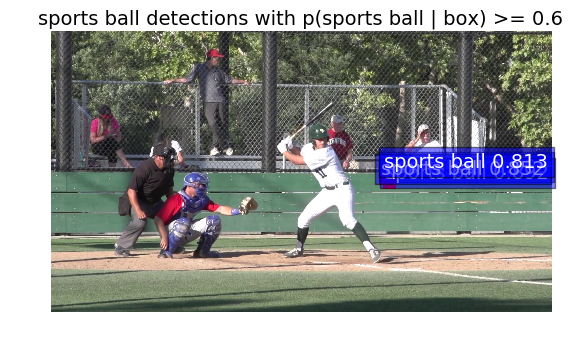

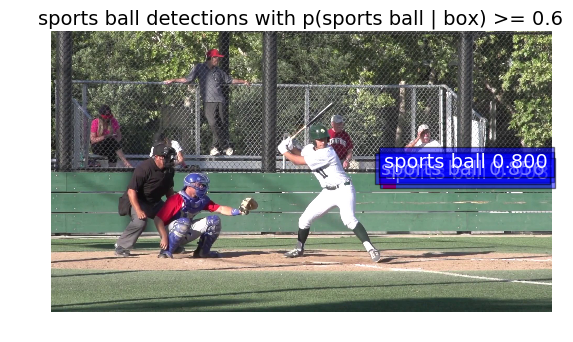

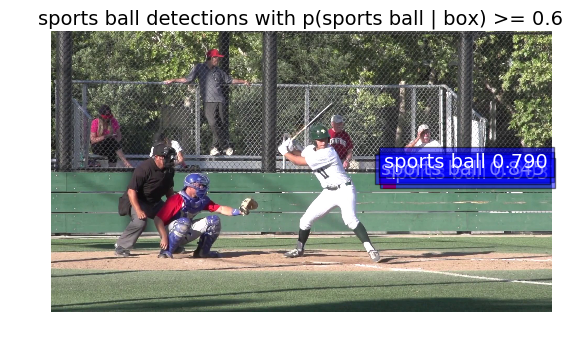

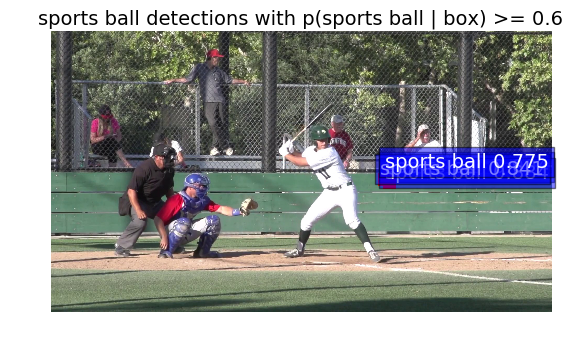

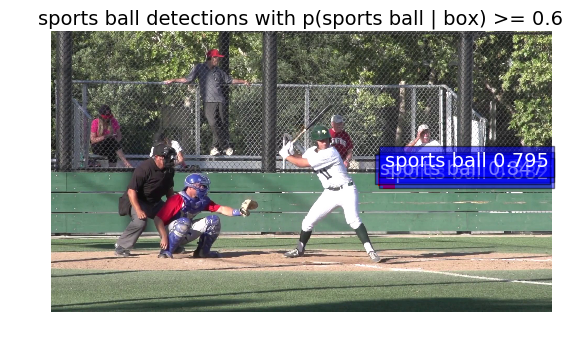

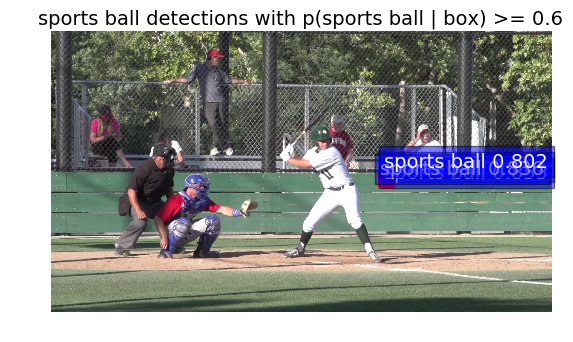

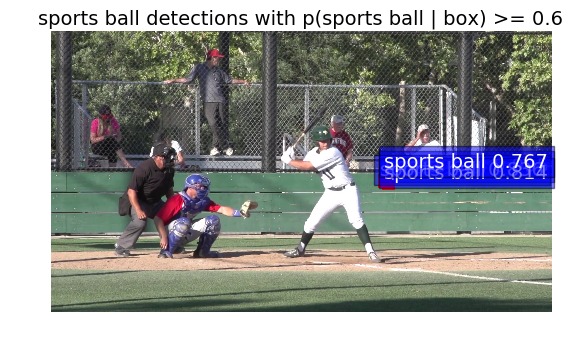

KeyboardInterrupt: 

In [3]:
CLASSES = ('background',
'person', 'bicycle', 'car','motorcycle','airplane','bus','train', 'truck', 'boat','traffic light',
'fire hydrant', 'stop sign', 'parking meter', 'bench','bird','cat','dog','horse','sheep',
'cow', 'elephant','bear','zebra','giraffe','hat','umbrella', 'handbag','tie','suitcase',
'frisbee','skis','snowboard','sports ball','kite', 'baseball bat','baseball glove','skateboard','surfboard','tennis racket',
'bottle','wine glass','cup','fork','knife','spoon','bowl','banana','apple','sandwich',
'orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch','potted plant',
'bed','dining table','window','tv','laptop','mouse','remote','keyboard','cell phone','microwave',
'oven', 'sink','refrigerator','blender','book','clock','vase','scissors','teddy bear','hair drier','tooth brush')

def vis_detections(im, class_name, dets, thresh=0.5):
    """Draw detected bounding boxes."""
    inds = np.where(dets[:, -1] >= thresh)[0]
    #if len(inds) == 0:
    #    return
    if len(inds)==0:
        return
    #im = im[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(im, aspect='equal')
    for i in inds:
        bbox = dets[i, :4]
        score = dets[i, -1]

        ax.add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='red', linewidth=3.5)
            )
        ax.text(bbox[0], bbox[1] - 2,
                '{:s} {:.3f}'.format(class_name, score),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')

    ax.set_title(('{} detections with '
                  'p({} | box) >= {:.1f}').format(class_name, class_name,
                                                  thresh),
                  fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.draw()
    plt.show()

from os import listdir
path = "/Users/ninawiedemann/Desktop/UNI/Praktikum/py-faster-rcnn/tools/inputpic/"
# scores = np.load(path+"/scores000542.jpg.npy")
# boxes = np.load(path+"/boxes000542.jpg.npy")
n = 0
m = 0
print("all", len(listdir(path)))
for f in listdir(path):
    if f[0]!="." and int(f[3:-4])>200 and int(f[3:-4])<400:
        #print(int(f[3:-4]))
        im = plt.imread(path+f)
        with open("/Users/ninawiedemann/Desktop/UNI/Praktikum/py-faster-rcnn/tools/outputpic/out"+f[:-4], "r") as infile:
            dets_dic = json.load(infile)
        #print(dets_dic)
        CONF_THRESH = 0.6
        NMS_THRESH = 0.3

        for cls_ind, cls in enumerate(CLASSES[35:36]):
            # cls_ind += 1 # because we skipped background
            # cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
            # cls_scores = scores[:, cls_ind]
            # dets = np.hstack((cls_boxes,
            #                   cls_scores[:, np.newaxis])).astype(np.float32)
            # keep = nms(dets, NMS_THRESH)
            try:
                dets = dets_dic[cls]# dets[keep, :]
                vis_detections(im, cls, np.array(dets), thresh=CONF_THRESH)
                n+=1
            except KeyError:
                m+=1
                continue
                #print("class not in image", cls)
print("detected: ", n/float(n+m))

In [2]:
import tarfile

In [3]:
tar = tarfile.open(name = "/Volumes/Nina Backup/hico_20160224_det.tar", mode = "r")

In [25]:
print(len(res.keys()))

681


In [4]:
from scipy import io
b = io.loadmat("hico_20160224_det/anno_bbox.mat")

In [ ]:
for i in b["bbox_train"][0][0][2][0]:
    for j in range(5):
        print(i[j])
    print(" ")

In [ ]:
print(b["list_action"][225])
print(len(b["bbox_train"][0]))

In [10]:
import numpy as np

res = {}
bat_list = np.arange(225, 232, 1)
for img in b["bbox_train"][0]:
    name = img[0][0]
    boxes = img[2][0]
    for box in boxes:
        if box[0][0] in bat_list:
            #print(name)
            #print(np.asarray(bbox)[0][0])
            #print(box[0,2])
            #print(len(bbox), len(bbox[0]))
            try:  
                bat_box = box[2][0]
                res[name]=[]
                for bats in bat_box:
                    one_bat = []
                    for xy in bats:
                        #print(xy)
                        one_bat.append(float(xy[0][0]))
                    res[name].append(one_bat)
                #l = tar.getmember('hico_20160224_det/images/train2015/'+name)
                #tar.extract(l, path = "/Volumes/Nina Backup/hico_images/")
                break
            except IndexError:
                print("missing bbox", name)
                continue
            
#print(res)
with open("/Volumes/Nina Backup/hico_images/labels_bboxes.json", "w") as outfile:
    json.dump(res, outfile)

missing bbox HICO_train2015_00001202.jpg
missing bbox HICO_train2015_00003461.jpg
missing bbox HICO_train2015_00013559.jpg
missing bbox HICO_train2015_00022772.jpg
missing bbox HICO_train2015_00027820.jpg


In [21]:
#bbox = [77, 583,115, 396]
def draw_box(image, boxes, name):
    if len(boxes)>1:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(image, aspect='equal')
        for bbox in boxes:
            ax.add_patch(
                        plt.Rectangle((int(bbox[0]), int(bbox[2])),
                                      int(bbox[1]-bbox[0]),
                                      int(bbox[3]-bbox[2]), fill=False,
                                      edgecolor='red', linewidth=3.5))
        plt.draw()
        plt.savefig("/Volumes/Nina Backup/hico_images/examples/"+name)
        plt.show()

In [ ]:
for key in list(res.keys()):
    im = plt.imread('/Volumes/Nina Backup/hico_images/hico_20160224_det/images/train2015/'+key)
    box = res[key]
    draw_box(im, box, key[:-4])

In [27]:
with open("/Volumes/Nina Backup/hico_images/annotations/instances_train2017.json", "r") as infile:
    anno = json.load(infile)

In [46]:
images = []
for detection in anno["annotations"]:
    #print(detection["category_id"])
    if detection["category_id"]==39:
        images.append(detection["image_id"])
print(len(np.unique(images)))

2506


In [34]:
print(len(anno["images"]), len(anno["annotations"]))

118287 860001


In [45]:
for img in anno["images"][:10]:
    print(img)

{'width': 640, 'id': 391895, 'license': 3, 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'height': 360, 'date_captured': '2013-11-14 11:18:45', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'file_name': '000000391895.jpg'}
{'width': 640, 'id': 522418, 'license': 4, 'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg', 'height': 480, 'date_captured': '2013-11-14 11:38:44', 'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg', 'file_name': '000000522418.jpg'}
{'width': 500, 'id': 184613, 'license': 3, 'flickr_url': 'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg', 'height': 336, 'date_captured': '2013-11-14 12:36:29', 'coco_url': 'http://images.cocodataset.org/train2017/000000184613.jpg', 'file_name': '000000184613.jpg'}
{'width': 556, 'id': 318219, 'license': 3, 'flickr_url': 'http://farm5.staticflickr.com/4125/5094763076_813ea2751b_z.jpg', 'height': 640, 'date_captured': 